### 2016 Election Results


By Bryan Novy Jan 2017 

The 2016 presidential election was one of the most remarkable in the history of the United States. It witnessed the stellar rise of a major political outsider, Donald Trump, who was then pitted against one of the most accomplished politicians in modern American history, Hillary Clinton. Both the public and elites feverishly followed presidential polls to try and make sense of this campaign. Surely a man as brash and unhinged as Mr.Trump’s number were going to start diving at any moment? Yet he stayed afloat. And despite Clinton dominating the polls for months, she ultimately lost to her opponent. Were the polls "wrong"? While they heavily favored Hillary Clinton, the race was actually quite close near the end and Mr. Trump’s chances of winning, especially after the primaries, were not exactly unreasonable.

Trump’s string of successes blew away just about every political pundit and policy watcher. He went from shredding fellow GOP candidates during the primaries to defying numerous scandals to finally smashing the Clinton machine. Trump would not stop winning. One of the reasons so many experts were convinced Trump would lose the election (other than him being morally and ethically decrepit, especially by the standards of “Family Values” conservatives) was due to the fact that poll after poll showed Clinton soaring over Trump and his “basket of deplorables.”

Polls rarely or never showed Mr. Trump making so much as a dent in the “Rust Belt”, America’s vast and horribly neglected Midwest industrial zone, which had been dependably Democratic since the Reagan administration. Trump’s ultimate success in the Midwest makes perfect sense in retrospect, given his verbose campaign commitments to resurrecting American manufacturing and generating jobs.

This article will perform a data analysis of the 2016 presidential election polls, as well as the final election results. The campaign polling data was taken from the Huffington Post Election website. The polling data is an aggregation of about 1,500 polls taken through out the campaign season.  The final state-by-state polls, as well as the final election results, were also taken from the Huffington Post.

This analysis will be concerned with the following questions:

Who participated in these polls and what party affiliation did the polls have?

Did the poll results favor Hillary or Trump? How did voter sentiment change over time?

Did any events affect their decision?  Can we see an effect in the polls from the debates?

How do the poll numbers compare with the election results? 

What do the results mean? Were the polls "wrong"?

### Collect the Data

In [1]:
#Imports

#For data analysis:

import pandas as pd
from pandas import Series,DataFrame 
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#Use this to grab data from the web (HTTP capabilities)

import requests

#We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method

from io import StringIO

In [3]:
#Collect data from the website
url = 'http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

source = requests.get(url).text

poll_data = StringIO(source)

In [4]:
#Create a Dataframe
poll_df = pd.read_csv(poll_data)

In [5]:
#Look at info
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


In [6]:
#Check the Dataframe
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [7]:
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1
5,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,3669.0,Likely Voters,Internet,41.0,45.0,5.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,None,NaN,1
6,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1392.0,Likely Voters - Democrat,Internet,6.0,90.0,2.0,2.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,None,NaN,1
7,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1110.0,Likely Voters - Republican,Internet,84.0,4.0,4.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,None,NaN,1
8,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1167.0,Likely Voters - independent,Internet,44.0,31.0,9.0,8.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,None,NaN,1
9,Lucid/The Times-Picayune,2016-11-04,2016-11-06,2016-11-07T15:43:26Z,931.0,Likely Voters,Internet,40.0,45.0,2.0,7.0,http://elections.huffingtonpost.com/pollster/p...,https://luc.id/2016-presidential-tracker/,Nonpartisan,None,NaN,1


### Who participated in these polls?

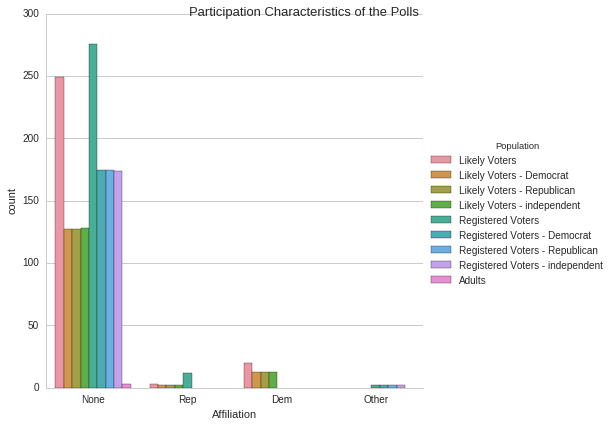

In [8]:
g = sns.factorplot('Affiliation',kind='count',data=poll_df, hue='Population',size=6,aspect=1)

g.fig.suptitle("Participation Characteristics of the Polls",fontsize=13)

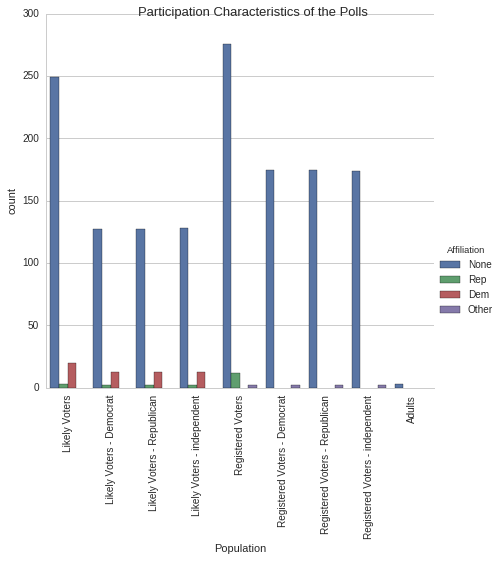

In [9]:
#Would switching the population and affiliation make this graph more clear?

g = sns.factorplot('Population',kind='count',data=poll_df,hue='Affiliation',size=6,aspect=1)

g.fig.suptitle('Participation Characteristics of the Polls',fontsize=13)

g.set_xticklabels(rotation=90)

The population is separated into nine categories.

Mostly 'Likely' and 'Registered' voters participated in these surveys.

There are a lot of polls targeting specific parties.

### Who are these polls affiliated with?

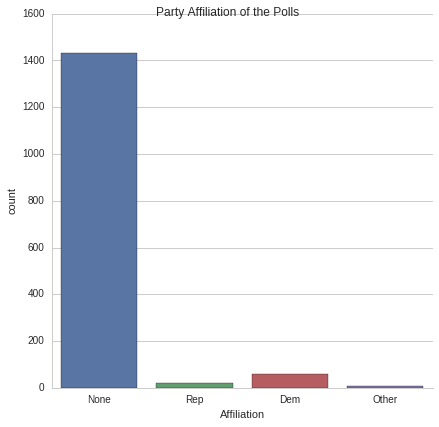

In [10]:
h = sns.factorplot('Affiliation',kind='count',data=poll_df,size=6,aspect=1)

h.fig.suptitle("Party Affiliation of the Polls",fontsize=12)

There are relatively more Democratic polls in this dataset, but there is still a strong neutrality. The set leans slightly towards Democrats in aggregate.

### Averages

What were the average poll numbers for Trump and Clinton?

What were the averages for the for the participantes who remained undecided?

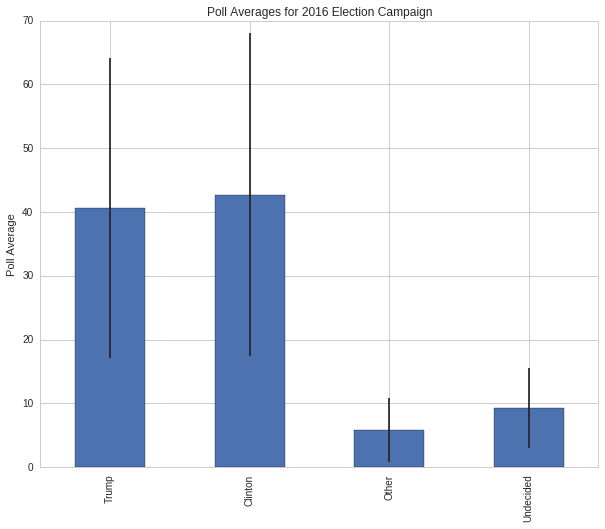

In [11]:
#First we'll get the average
#We dont care about the average number of observations or question iterations here
#We care about the average percentage values b/w Trump and Hillary

avg = pd.DataFrame(poll_df.mean())
avg.drop ('Number of Observations', axis=0, inplace=True)
avg.drop('Question Iteration', axis=0,inplace=True)

#Next we'll get the standard deviation
#Check the error

std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)
std.drop('Question Iteration', axis=0,inplace=True)

#Make a plot
#yerr (y error) set equal to std

trump_clinton_avg = avg.plot(yerr=std,kind='bar',figsize=(10,8),legend=False)
trump_clinton_avg.set_title('Poll Averages for 2016 Election Campaign')
trump_clinton_avg.set_ylabel('Poll Average')

The aggregated poll results clearly prefer Mrs. Clinton.  The averages are fairly close but the standard deviation is enormous!

In [12]:
# a more precise display of the averages and standard deviations

avg.head()

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [13]:
std.head()

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


In [14]:
#Concatenate the Average and Stan Dev DataFrames

poll_avg = pd.concat([avg,std],axis=1)

#Rename columns 
poll_avg.columns = ['Average','STD']

#Show
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


This data indicates a close race. The averages for Clinton and Trump are 2.09% points apart which is slightly narrower than the 2012 race (2.2%)

### How does the data look over the course of the campaign?

?An undecided voter is highly likely to vote and will most likely pick one candiate or the other. If we slipt the ??undecided voters evenly between the two candidates that should show an unbiased estimate of how they voted and ??what affect that might have had on the election.

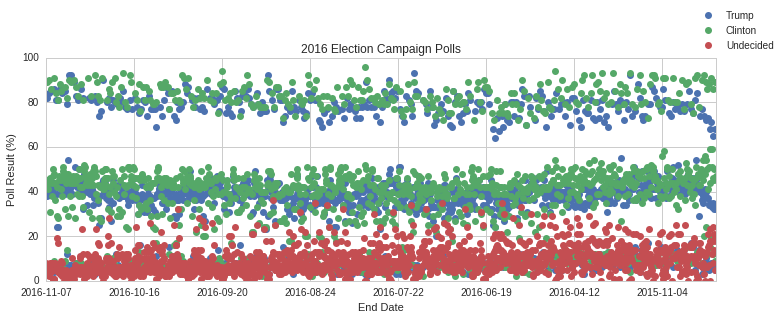

In [15]:
#2016 election Time Series scatter plot to illustrate voter sentiment

voter_sent = poll_df.plot(x='End Date',y=['Trump','Clinton','Undecided'],figsize=(12,4),linestyle='',marker='o',legend=False)
voter_sent.set_title('2016 Election Campaign Polls')
voter_sent.set_ylabel('Poll Result (%)')
voter_sent.legend(bbox_to_anchor=(1.1, 1.25))

The data in the 75% - 90% range is from the polls that asked members of one political party who they were voting for. Not surprisingly, they were mostly voting for the candidate running in their party!

The 30%-60% range are from polls that asked everyone who they were voting for, regardless of what party they were in. That resulted in surveys with a more appropriate regression to the mean.

The undecideds were a minority, typically below 20%.

Trump's support was relatively low at the start of the campaign season, in early November 2015. His numbers increase fairly quickly, though. It is clear that the public was beginning to  considered Trump a legitimate candidate. The data shows that by the end of the month he was a strong contender to take on Hillary Clinton.

The numbers in the undecided category are a bit erratic. The undecideds surged in number about two dozen times,  to between 30%-40%, midway through the election season.

This was indeed a very contentious election.

What was the difference between Clinton and Trump's popularity in the polls?

We can check that by subtracting Trump's polls from Clinton's polls over time.

A positive number would indicate Clinton's favorability while a negative number would indicate Trump's favorability.

In [16]:
#Let's define a new column in our dataframe to take into account the difference b/w Trump and Clinton in the polls

poll_df['Poll Difference (%)'] = (poll_df.Clinton - poll_df.Trump )/100

In [17]:
#import time stamp

from datetime import datetime

In [18]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Poll Difference (%)
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


The difference column is created and was added to the dataframe.

Now we can visualize the difference, which indicates public sentiment, over time.

In [19]:
#Create a new dataframe
#Use GroupBy to group the polls by their start date and then sort it by the start date

start_poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

#This says 'Take your poll df, group it by the start dates and then set 'as_index' to false'
#'Then take the average of all those polls'
#'as_index=False' means you keep the current index

In [20]:
start_poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Poll Difference (%)
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,0.1425


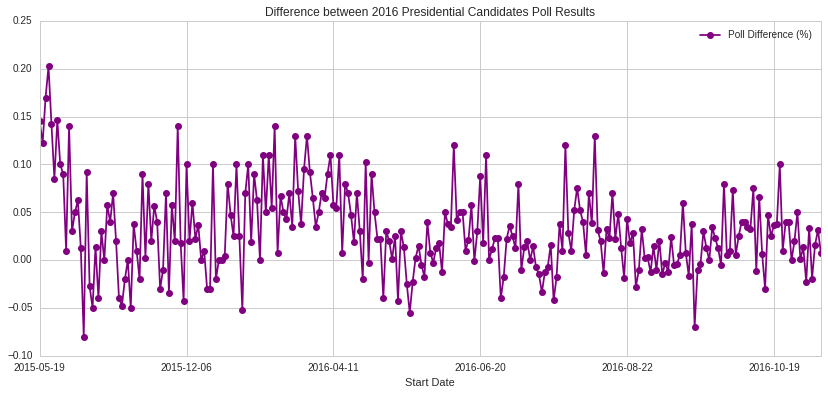

In [21]:
#Use the new dataframe to plot our difference ('the difference b/w candidates popularity, aka sentiment') over time

diff_plot = start_poll_df.plot('Start Date','Poll Difference (%)',figsize=(14,6),marker='o',linestyle='-',color='purple')
diff_plot.set_title('Difference between 2016 Presidential Candidates Poll Results')

This shows the precise difference in popularity between the candidates through out the campaign.

For the most part, Mrs.Clinton commanded the polls.

She had two dry spells in 2016, in May and June. These coincide with announcements by the FBI concerning its investigation of her inappropriate storage of classified materials in official government emails on a private server during her time as Secretary of State. This was her most debilitating scandal as her popular support was slow to recover after the FBI's announcements.

Trump took his biggest hit in the polls after he insulted a gold star family who criticized him at the Democratic National Convention. Clinton saw her highest favorability ratings in the latter half of the campaign after that incident. Trump eventually recovered, however.

Overall, Clinton maintained the lead over Trump in the polls for much of the campaign. This was one of the main pieces of evidence that pundits used to claim that Trump would never beat Clinton.

#How many times was her favorability greater than 10%? How many times was Trumps favorability less than -5%?


In [22]:
#Clinton's favoribility greater than 10% of Trump?
for difference in start_poll_df['Poll Difference (%)']:
    if difference > .1:
        print(difference)

0.145
0.1225
0.17
0.2025
0.1425
0.14625
0.14
0.14
0.11
0.11
0.14
0.13
0.13
0.11
0.11
0.1025
0.12
0.11
0.12
0.13


In [23]:
#How many times was Trump's favorability greater than 5% (-0.05) of Clinton?

for difference in start_poll_df['Poll Difference (%)']:
    if difference < -.05:
        print(difference)

-0.08
-0.0525
-0.055
-0.07


Clinton's favorability exceeded Trump by 10% in 20 polls throughout the campaign. Trump did not exceed Clinton by 10% at any point. Trump's favorability exceeded Clinton by 5% in only 4 polls.

Did the debates or the "October Surprises" affect the polls?

How did the polls respond to the candidate's debate performance? What about big 11th hour scandals like Trump's infamous "grab 'em by the pussy!" tape leak or the final FBI probe into Clinton's emails 11 days before the election? Did those events affect movements in the polls?

In [24]:
#Create a for loop to find the index entires for the months of Sept and Oct 2016
#We need to find where to set the x limits in the 'difference over time' graph
#we can define x limits by using the index of our dataframe
#We want to find where the start dates were equal to Sept and Oct 2016
#The for loop should say that for every date column, if the first seven terms of the 
#date are equal to Sept or Oct, then append to the xlimit the empty list at that row index,
#then add one to the row index to keep the count going
#Otherwise just add one to the row index, Then have the xlimit be a list of the index of the whole months
#Then the for loop should cycle through the index til it finds 2016-9, 2016-10

#Set row count and the xlimit list
row_in = 0
xlimit = []

#Cycle through dates until 2012-10 is found, then print row index
for date in start_poll_df['Start Date']:
    if date[0:7] == '2016-09': #if first 7 terms are equal to Sept
        xlimit.append(row_in)
        row_in += 1 #row in is counting the index row, as it goes through the for loop
    elif date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

209
262


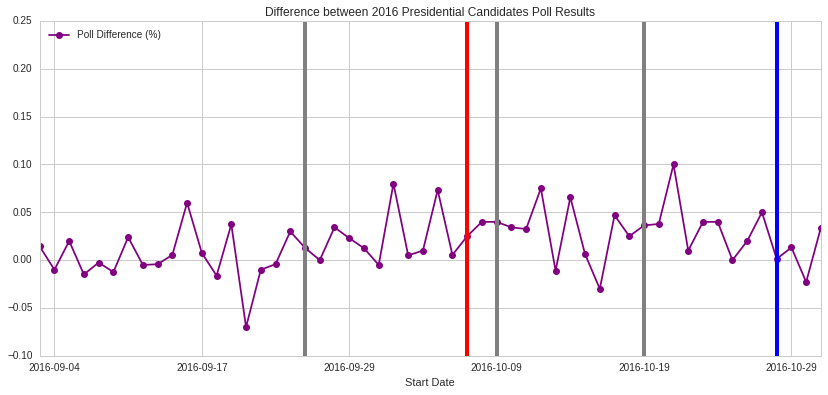

In [25]:
#To show you why we need to do that, replot the Difference plot
#Keep everything the same, except now set the xlimits
#This shows the dates od Sept and Oct 2016

diff_start_plot = start_poll_df.plot('Start Date','Poll Difference (%)',figsize=(14,6),marker='o',linestyle='-',color='purple',xlim=(209,262))

diff_start_plot.set_title('Difference between 2016 Presidential Candidates Poll Results')

#Let's add markers to the debate dates, with arithmatic!


#Sept 26 Debate 1 (Sept 1 = 209)
plt.axvline(x=209+18,linewidth=4,color='grey')

#Oct 7th Trump Access Hollywood Tape "Grab 'em by the pussy!" Leak
plt.axvline(x=232+6,linewidth=4,color='red')

#Oct 9th Debate 2 
plt.axvline(x=232+8,linewidth=4,color='grey')

#Oct 19th Debate 3
plt.axvline(x=232+18,linewidth=4,color='grey')

#Oct 28th FBI Clinton Email Probe Announcement
plt.axvline(x=232+27,linewidth=4,color='blue')


The grey lines represent the debates, the red line represents Trump's tape leak, while the blue line represents the FBI's email announcement.

Trump's numbers increased slightly after the first two debates, while the tape leak did not really impact his polls much. Other than his xenophobic slander against Mexicans and Muslims, this tape was the campaign's single most boorish and vulgar example of Trump's moral character defects. He bragged about approaching and sexually molesting women without overt consent on the premise that he was such a famous celebrity that women would allow him to.

He apologized for the tape and stated that it was simply "locker room talk". Trump took a bit of a hit for this in the polls, but he soon recovered, most likely due to his second debate performance.

Clinton's numbers increased dramatically after the third debate, but they went into a tizzy after the FBI announced a renewed probe into her State Department emails. Her numbers seemed to have bounced back after a couple of days, however.

If we add then divide the last two months of Trump and Clinton's favorability, we chould get a reasonable estimate of Trump's chances of winning.

14 Trump Points + 40 Clinton Points = 54 points

14/54 = 25.9% chance of Trump win? 1 in 4. 

Trump had a favorability of about 26% over the last two months in the polls.

What about the final days of the election?

If we set the the Difference graph to show the end dates instead of the start dates, we can see the final week of the election season.

In [26]:
#The End

end_poll_df = poll_df.groupby(['End Date'],as_index=False).mean()

In [27]:
row_in = 0
xlimit = [] 

for date in end_poll_df['End Date']:
    if date[0:7] == '2016-10': #if first 7 terms are equal to Sept
        xlimit.append(row_in)
        row_in += 1 #row in is counting the index row, as it goes through the forloop
    elif date[0:7] == '2016-11':
        xlimit.append(row_in)
        row_in += 1
    else: 
        row_in += 1
print(min(xlimit))
print(max(xlimit))

208
245


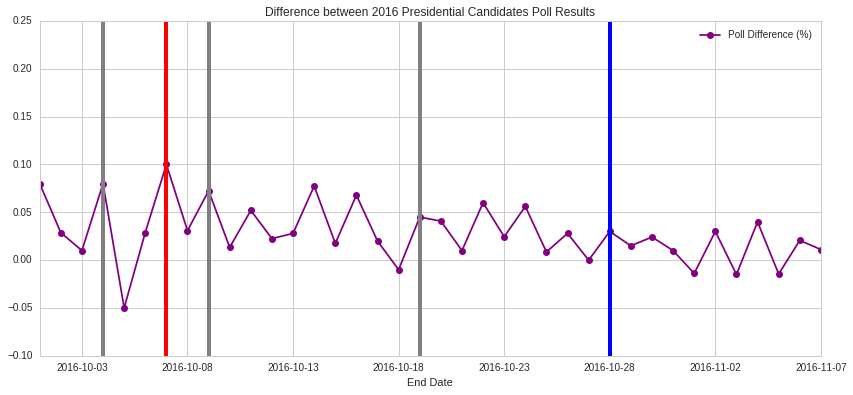

In [28]:
diff_end_plot = end_poll_df.plot('End Date','Poll Difference (%)',figsize=(14,6),marker='o',linestyle='-',color='purple',xlim=(208,245))

diff_end_plot.set_title('Difference between 2016 Presidential Candidates Poll Results')

#Oct 4th Debate 2 (Oct 1 = 232)
plt.axvline(x=208 + 3,linewidth=4,color='grey')

#Oct 7th Trump Access Hollywood Tape "Grab 'em by the pussy"
plt.axvline(x=208 + 6,linewidth=4,color='red')

#Oct 9th Debate 3
plt.axvline(x=208+8,linewidth=4,color='grey')

#Oct 19th Debate 4
plt.axvline(x=208+18,linewidth=4,color='grey')

#Oct 28 FBI Clinton Email Announcement
plt.axvline(x=208+27,linewidth=4,color='blue')

This new graph shows the survey's end dates, including November, which illustrated how much the polls fluctuated in the last days of the campaign. There was clearly a very close tug of war going on in the candidates polls. The 2012 election did not see this kind of fluctuation. Obama maintained a marginal lead over his opponent in the last week. 

If we add and divide the candidates favorability in Novemeber we could get Trumps's last minute chances of winning.

3 Trump Points + 4 Clinton Points = 7 

3/7 = 42% of Trump win?

Trump's favorability increased in the last week of the race from about a 26% to about 42%. It is reasonable to assume that this drastic increase in favorability may have impacted Trump's chances of becoming president in the last moments of the campaign.

### Final Polls vs Final Results

Next the contrast between the final polls and the actual election results will be analyzed. This can be used to study the predictive power of these polls.

As we now know, Mrs. Clinton lost to her opponent despite being massively popular in the polls. So were the polls "wrong"? What states flipped at the last minute? Can we compare the final polls with the final outcome?

What were the final polls state by state?

Here are the final polls of the campaign season:

In [29]:
#index = states, columns = candidates

#before_election = pd.DataFrame(index=states, columns=['Trump','Clinton'])

In [30]:
#Final Polls DataFrame

#Source: http://elections.huffingtonpost.com/pollster#2016-general-election

headings = ['State', 'Trump Final Poll (%)', 'Clinton Final Poll (%)']

table = [
    
    ['Alabama',57,38],
    ['Alaska',43,36],
    ['Arizona',47,45],
    ['Arkansas',51,34],
    ['California',31,54],
    ['Colorado',39,44],
    ['Connecticut',37,50],
    ['Delaware',35,49],
    ['Florida',45,47],
    ['Georgia',48,46],
    ['Hawaii',32,60],
    ['Idaho',47,27],
    ['Illinois',35,51],
    ['Indiana',47,37],
    ['Iowa',42,39],
    ['Kansas',48,35],
    ['Kentucky',59,37],
    ['Louisiana',48,36],
    ['Maine',39,48],
    ['Maryland',30,58],
    ['Massachusetts',29,52],
    ['Michigan',42,48],
    ['Minnesota',39,45],
    ['Mississippi',51,42],
    ['Missouri',46,39],
    ['Montana',53,37],
    ['Nebraska',53,36],
    ['Nevada',42,44],
    ['New Hampshire',40,43],
    ['New Jersey',37,49],
    ['New Mexico',35,43],
    ['New York',33,53],
    ['North Carolina',44,45],
    ['North Dakota',57,35],
    ['Ohio',44,43],
    ['Oklahoma',56,31],
    ['Oregon',35,45],
    ['Pennsylvania',41,46],
    ['Rhode Island',40,55],
    ['South Carolina',45,39],
    ['South Dakota',54,37],
    ['Tennessee',49,36],
    ['Texas',49,44],
    ['Utah',35,26],
    ['Vermont',24,51],
    ['Virginia',41,46],
    ['Washington',35,49],
    #['DC',6,86],
    ['West Virginia',54,30],
    ['Wisconsin',40,46],
    ['Wyoming',66,27]
    
]

final_poll = pd.DataFrame(columns=headings, data=table) #Put % over/in/on top of bars?
final_poll

,State,Trump Final Poll (%),Clinton Final Poll (%)
0,Alabama,57,38
1,Alaska,43,36
2,Arizona,47,45
3,Arkansas,51,34
4,California,31,54
5,Colorado,39,44
6,Connecticut,37,50
7,Delaware,35,49
8,Florida,45,47
9,Georgia,48,46


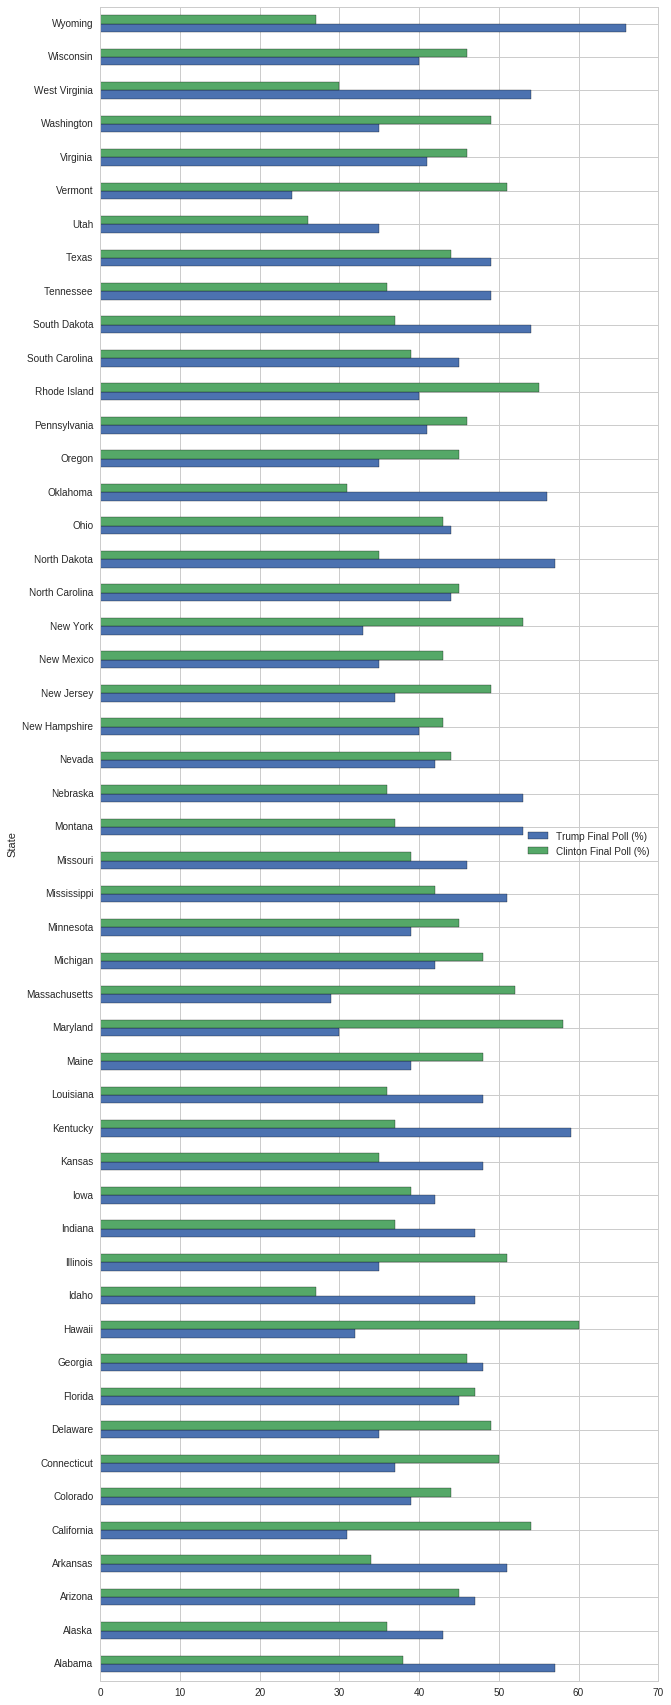

In [31]:
final_poll.plot('State',kind='barh',figsize=(10,30))

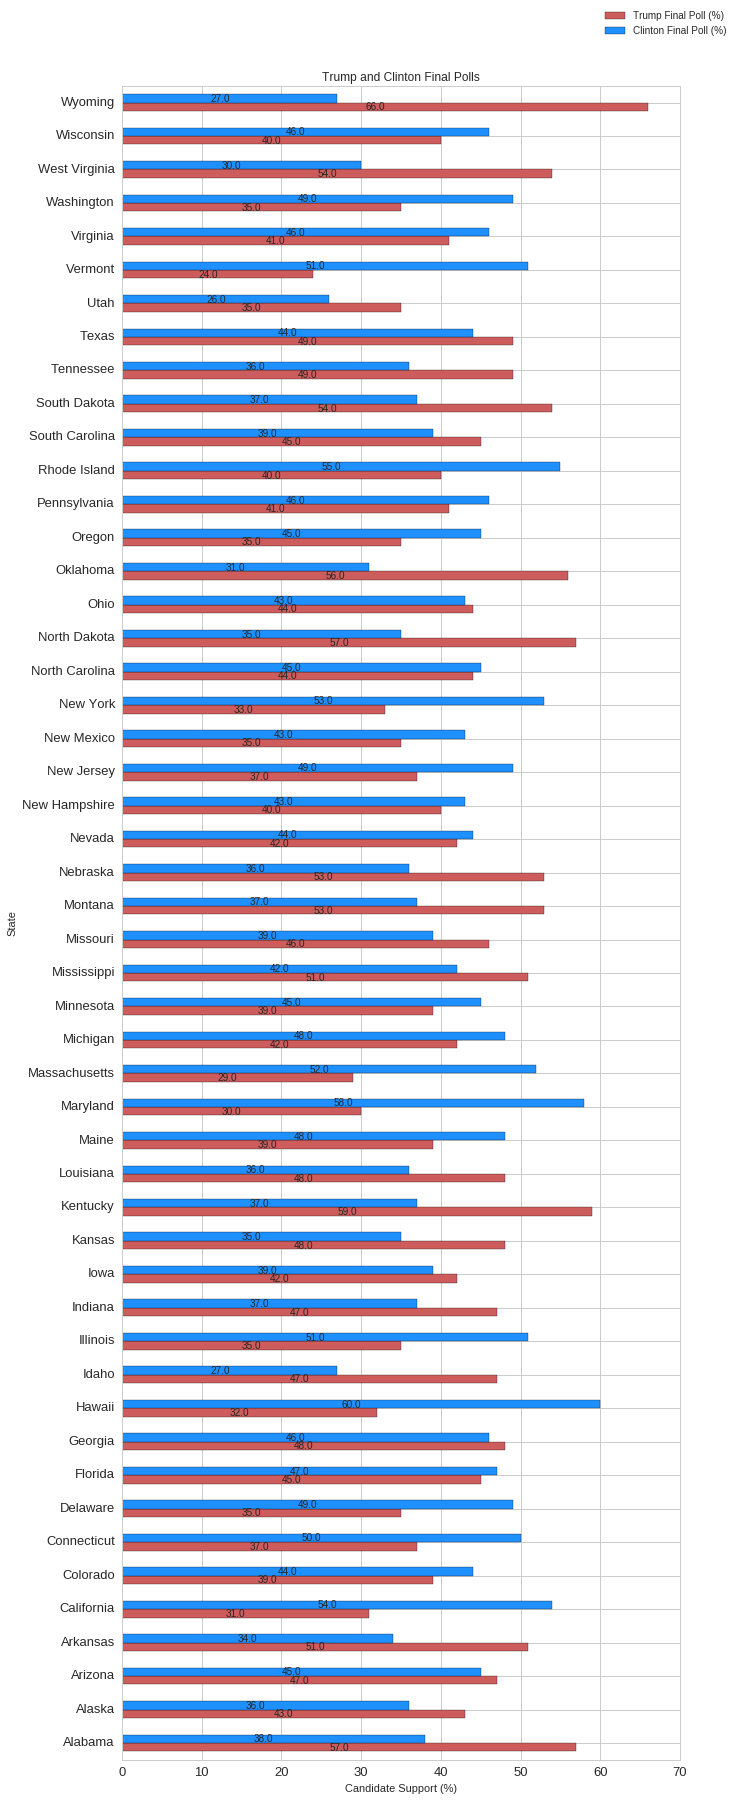

In [32]:

def autolabel(rects):
    x_pos = [rect.get_x() + rect.get_width()/2. for rect in rects]
    y_pos = [rect.get_y() + 1.05*rect.get_height() for rect in rects]
    #if height constant: hbars, vbars otherwise
    if (np.diff([plt.getp(item, 'width') for item in rects])==0).all():
        scores = [plt.getp(item, 'height') for item in rects]
    else:
        scores = [plt.getp(item, 'width') for item in rects]
    # attach some text labels
    for rect, x, y, s in zip(rects, x_pos, y_pos, scores):
        ax.text(x, 
                y,
                '%s'%s,
                ha='right', 
                va='top')

ax = final_poll.set_index(['State']).plot(kind='barh', figsize=(10,30), 
              color=['indianred', 'dodgerblue'], fontsize=13)

ax.set_alpha(0.8)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title('Trump and Clinton Final Polls')#,fontsize=18)
ax.set_xlabel('Candidate Support (%)')
autolabel(ax.patches)

In [33]:
# Final Election Result DataFrame

#Source: http://elections.huffingtonpost.com/2016/results/president

headings = ['State', 'Trump Election Result (%)', 'Clinton Election Result (%)']

table = [
    
    ['Alabama',63,35],
    ['Alaska',53,38],
    ['Arizona',50,45],
    ['Arkansas',60,34],
    ['California',33,62],
    ['Colorado',44,47],
    ['Connecticut',41,54],
    ['Delaware',42,53],
    ['Florida',49,48],
    ['Georgia',51,46],
    ['Hawaii',30,62],
    ['Idaho',59,28],
    ['Illinois',39,55],
    ['Indiana',57,38],
    ['Iowa',52,42],
    ['Kansas',57,36],
    ['Kentucky',63,33],
    ['Louisiana',58,38],
    ['Maine',45,48],
    ['Maryland',35,61],
    ['Massachusetts',34,61],
    ['Michigan',48,47],
    ['Minnesota',45,47],
    ['Mississippi',58,40],
    ['Missouri',57,38],
    ['Montana',57,36],
    ['Nebraska',60,34],
    ['Nevada',46,48],
    ['New Hampshire',47,48],
    ['New Jersey',42,55],
    ['New Mexico',40,48],
    ['New York',37,59],
    ['North Carolina',51,47],
    ['North Dakota',64,28],
    ['Ohio',52,44],
    ['Oklahoma',65,29],
    ['Oregon',41,52],
    ['Pennsylvania',49,48],
    ['Rhode Island',40,55],
    ['South Carolina',55,41],
    ['South Dakota',62,32],
    ['Tennessee',61,35],
    ['Texas',53,43],
    ['Utah',46,28],
    ['Vermont',33,61],
    ['Virginia',45,50],
    ['Washington',38,54],
    #['DC',4,93],
    ['West Virginia',69,26],
    ['Wisconsin',48,47],
    ['Wyoming',70,22]
    
]

final_result = pd.DataFrame(columns=headings, data=table) #Put % over/in/on top of bars?
final_result

,State,Trump Election Result (%),Clinton Election Result (%)
0,Alabama,63,35
1,Alaska,53,38
2,Arizona,50,45
3,Arkansas,60,34
4,California,33,62
5,Colorado,44,47
6,Connecticut,41,54
7,Delaware,42,53
8,Florida,49,48
9,Georgia,51,46


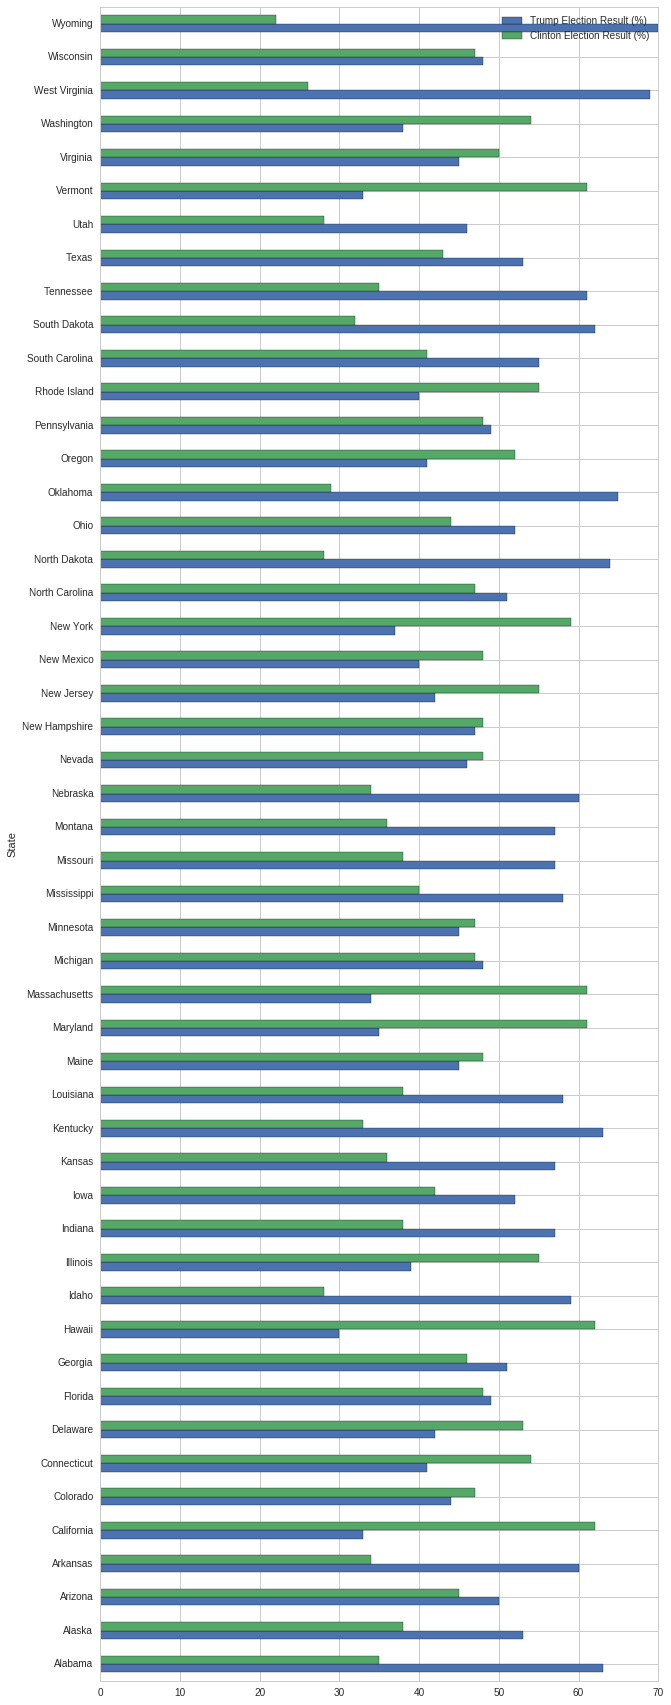

In [34]:
final_result.plot('State',kind='barh',figsize=(10,30))


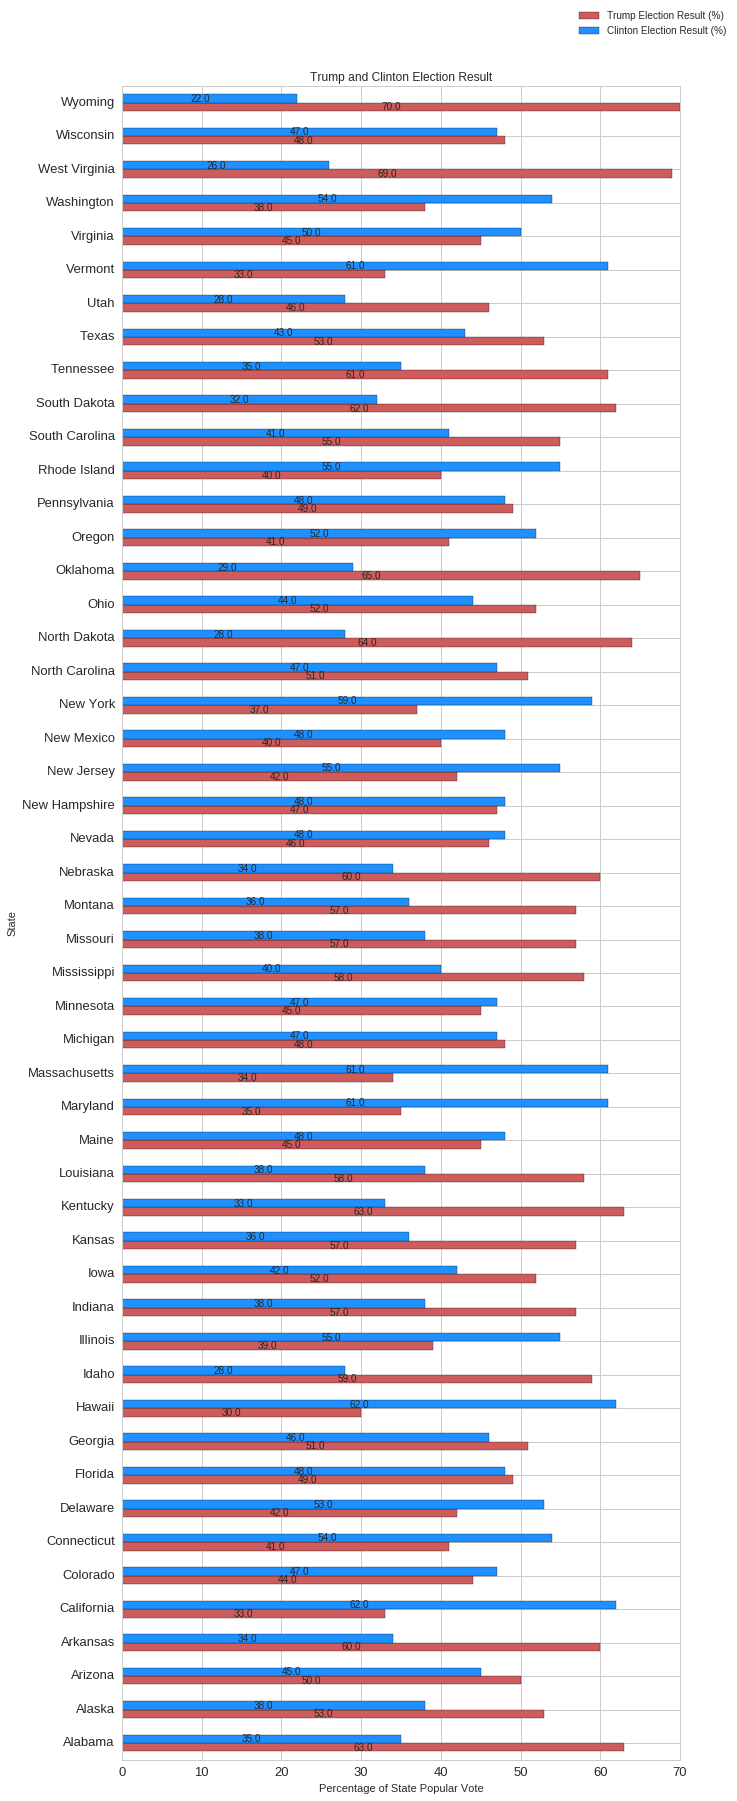

In [35]:
def autolabel(rects):
    x_pos = [rect.get_x() + rect.get_width()/2. for rect in rects]
    y_pos = [rect.get_y() + 1.05*rect.get_height() for rect in rects]
    #if height constant: hbars, vbars otherwise
    if (np.diff([plt.getp(item, 'width') for item in rects])==0).all():
        scores = [plt.getp(item, 'height') for item in rects]
    else:
        scores = [plt.getp(item, 'width') for item in rects]
    # attach some text labels
    for rect, x, y, s in zip(rects, x_pos, y_pos, scores):
        ax.text(x, 
                y,
                '%s'%s,
                ha='right', 
                va='top')

ax = final_result.set_index(['State']).plot(kind='barh', figsize=(10,30), 
              color=['indianred', 'dodgerblue'], fontsize=13)

ax.set_alpha(0.8)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title('Trump and Clinton Election Result')#,fontsize=18)
ax.set_xlabel('Percentage of State Popular Vote')
autolabel(ax.patches)

While these graphs are useful for referencing how a candidate performed in a given state, it's difficult to compare one candidate's performance to the other.

### What did candidates poll and election results look like side by side?

In [36]:
#final_concat = pd.concat([final_poll,final_result],axis=1)

In [37]:
#final_concat

In [38]:
final_merge = pd.merge(final_poll,final_result)

In [39]:
final_merge.head()

,State,Trump Final Poll (%),Clinton Final Poll (%),Trump Election Result (%),Clinton Election Result (%)
0,Alabama,57,38,63,35
1,Alaska,43,36,53,38
2,Arizona,47,45,50,45
3,Arkansas,51,34,60,34
4,California,31,54,33,62


In [40]:
final_merge.set_index('State',inplace=True)

In [41]:
final_merge.head()

,Trump Final Poll (%),Clinton Final Poll (%),Trump Election Result (%),Clinton Election Result (%)
State,,,,
Alabama,57,38,63,35
Alaska,43,36,53,38
Arizona,47,45,50,45
Arkansas,51,34,60,34
California,31,54,33,62


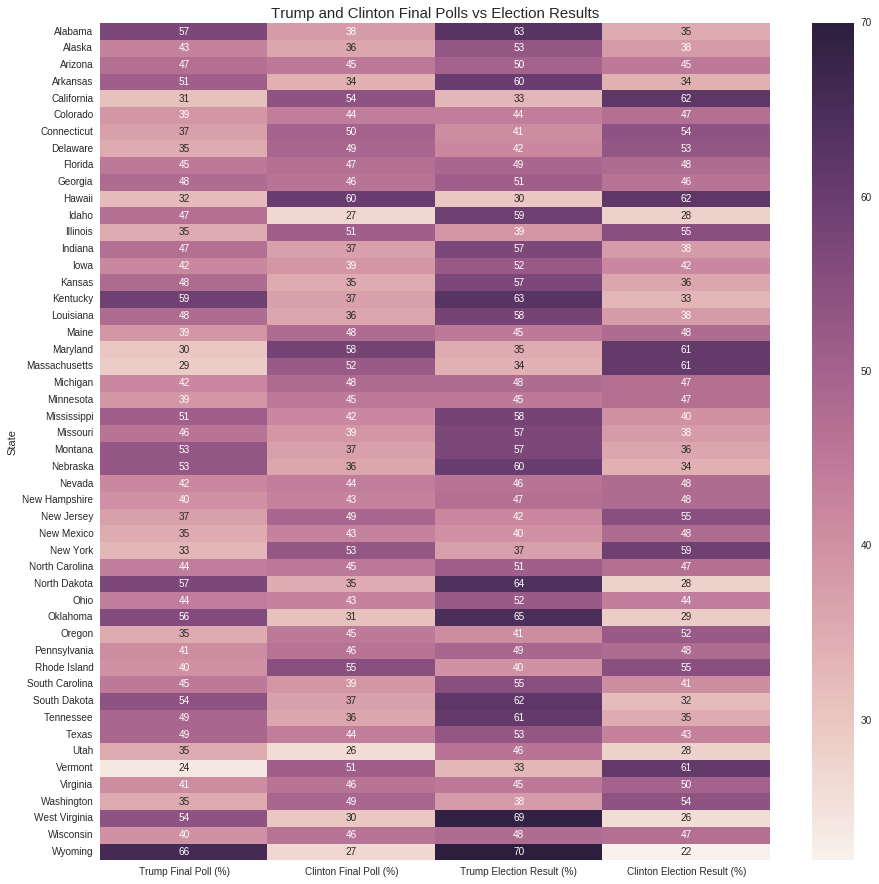

In [42]:
fig, ax = plt.subplots(figsize=(15,15))  

sns.heatmap(final_merge,annot=True,fmt='d',ax=ax)

ax.set_title('Trump and Clinton Final Polls vs Election Results',fontsize=15)

This illustrates the contrast between the two candidates polls and election results. Mr. Trump's numbers show a much more dramatic change than Mrs.Clinton. While Clinton's poll numbers translated closely into her election results, Trump performed much better than his poll numbers, both in swing states and in states where he was already popular. This is probably a result of undecideds and independents making up their minds on the night of the election.  

### How did the candidates performance in the swing states?

In [43]:
swing_states = final_merge.reindex(['Colorado', 'Florida', 'Iowa', 'Michigan', 'Nevada', 'New Hampshire', 'North Carolina', 'Ohio', 'Pennsylvania', 'Virginia', 'Wisconsin'])

In [44]:
swing_states

,Trump Final Poll (%),Clinton Final Poll (%),Trump Election Result (%),Clinton Election Result (%)
State,,,,
Colorado,39,44,44,47
Florida,45,47,49,48
Iowa,42,39,52,42
Michigan,42,48,48,47
Nevada,42,44,46,48
New Hampshire,40,43,47,48
North Carolina,44,45,51,47
Ohio,44,43,52,44
Pennsylvania,41,46,49,48


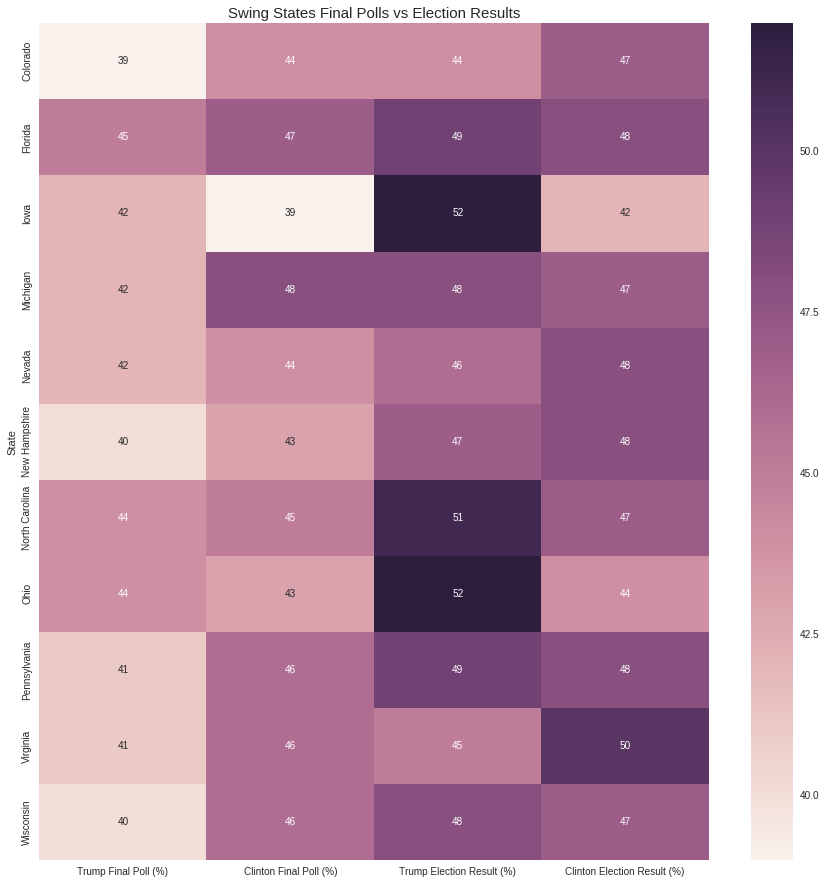

In [45]:
fig, ax = plt.subplots(figsize=(15,15))  

sns.heatmap(swing_states,annot=True,fmt='d',ax=ax)

ax.set_title('Swing States Final Polls vs Election Results',fontsize=15)

Florida, Michigan, North Carolina, Pennsylvania, and Wisconsin all went to Mr.Trump despite having final polls showing Mrs. Clinton in the lead. Michigan, Pennsylvania, Ohio and to a lesser extent ,Wisconsin are all members of the American "Rust Belt", the rapidly deindustrializing region once famous for auto and steel manufacturing.

In a way, Trump's major campaign plank was tailored for these states. He promised to reinvigorate American manufacturing, the loss of which these states are still reeling from. Though the polls showed him far behind in the region, he campaigned there anyway, holding massive rallies.

These states witnessed an enormous swell in support for Trump on election night, between 7 and 8 percentage points at times. While both candidates performed better in swing states on election night than their poll numbers indicated, it was Mr.Trump who enjoyed the much larger increase in support.



### How did Trump's polls and election results compare?

In [46]:
object_CC = final_merge

In [47]:
clinton_compare = object_CC.drop('Trump Final Poll (%)',axis=1) #?

In [48]:
clinton_compare = object_CC.drop('Trump Election Result (%)',axis=1)

In [49]:
new_clinton_compare = clinton_compare.drop('Trump Final Poll (%)',axis=1)

In [50]:
new_clinton_compare

,Clinton Final Poll (%),Clinton Election Result (%)
State,,
Alabama,38,35
Alaska,36,38
Arizona,45,45
Arkansas,34,34
California,54,62
Colorado,44,47
Connecticut,50,54
Delaware,49,53
Florida,47,48


In [51]:
object_TC = final_merge

In [52]:
object_TC = object_TC.drop('Clinton Final Poll (%)',axis=1)

In [53]:
object_TC = object_TC.drop('Clinton Election Result (%)',axis=1)

In [54]:
object_TC

,Trump Final Poll (%),Trump Election Result (%)
State,,
Alabama,57,63
Alaska,43,53
Arizona,47,50
Arkansas,51,60
California,31,33
Colorado,39,44
Connecticut,37,41
Delaware,35,42
Florida,45,49


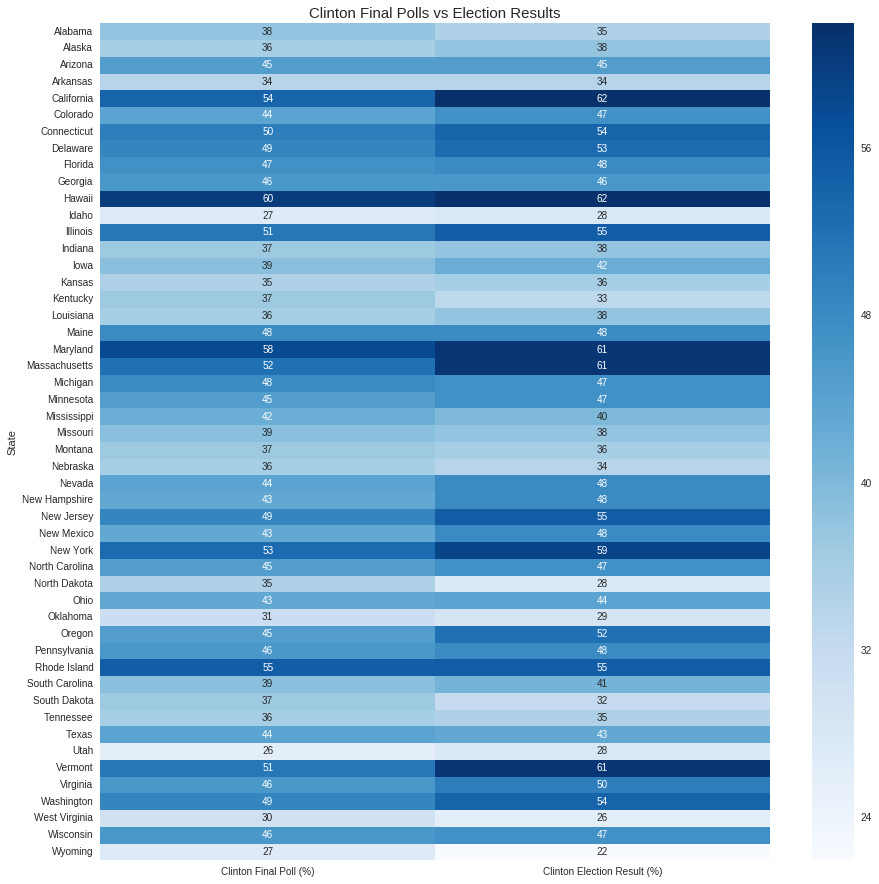

In [55]:
#Now make a heat map

fig, ax = plt.subplots(figsize=(15,15))  

sns.heatmap(new_clinton_compare,cmap='Blues',annot=True)

ax.set_title('Clinton Final Polls vs Election Results',fontsize=15)

Mrs.Clinton performed better in the Northeast than her polls anticipated. She enjoyed a large increase in support from states like Maryland, New York, Massachusetts and Vermont. She performed much better in California as well, by 8 percentage points. But she was already fairly popular in those states. Her numbers cooled off in a few places, such as in North Dakota, Mississippi, Oklahoma and West Virginia, states  where she wasn't too popular to begin with.

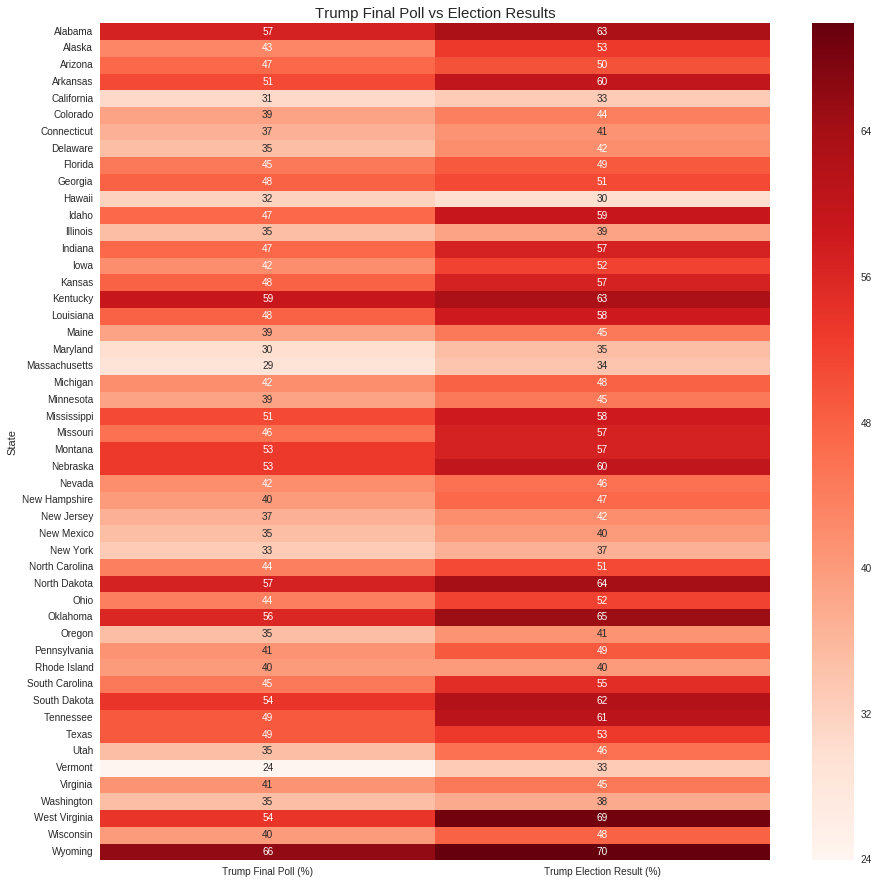

In [56]:
fig, ax = plt.subplots(figsize=(15,15))  

sns.heatmap(object_TC,cmap='Reds',annot=True)

ax.set_title('Trump Final Poll vs Election Results',fontsize=15)

This shows how much warmer Trump's election results were than his polls. He did better in every state on election night, except Hawaii. This would indicate that Trump successfully won over the independent/undecided voters, by a fairly wide margin. Trump defied expectation on election night, which was certainly a defining characteristic of the entire 2016 season.

### Conclusion

This analysis discussed the polls and election results, the populations that the polls sampled, the averages of the candidates through the campaign,  the differences between the candidates favorability overtime, what events affected the polls and how the final polls contrasted with the election outcome.

The polls favored Clinton throughout most of the campaign, but she lost due to a combination of the unpopularity her State Department email scandal coupled with Trump's stance on manufacturing renewal and his seemingly hopeless campaign rallies in Blue Rust Belt states such as Michigan, Ohio, Pennsylvania, and Wisconsin.

Trump experienced a much larger change in support on election night than Clinton. While her election results closely matched her poll numbers, Trump's results saw a big swell relative to his his polls. This could be attributed to winning the favor of undecideds at the last minute.

Were the polls wrong? Not exactly. The polls included the three main groups of voters, Clinton supporters, Trump supporters and undecideds. While undecideds may not support a specific candidate at the time they are questioned, they are highly likely to vote when the time comes.

Since the  polls accounted for all types of major voting groups, they can be said to be accurate. A poll is just a snapshot in time and has limited predictive power. The reason the election outcome was so different than what the polls led people to expect was only because the undecideds made their choice at the last minute, before their opinions could be reflected in the polls. And since the margin between Clinton and Trump supporters was so narrow (about 2.09%), any strong swing  among undecideds, who comprised about 9% of the polls, would decisively determine the outcome of the election.

Trump's favorability was 26% in September and October. This can be interpreted as having a 1 in 4 chance of getting elected. While that's far lower than Clinton's favorability, it's not unreasonable to assume that a candidate could succeed on a 1 in 4 chance. Trump's favorability increased by about 60% in the final week of the campaign (from 26% to 42%). This would indicate a better than 1 in 3 chance of winning.

Finally, considering that nearly 3 million more people voted for Clinton than Trump, the polls do indeed seem fairly accurate.

### Trivia  

The aggregated poll results clearly prefer Mrs. Clinton.

The average poll numbers for Clinton and Trump are 2.09% points apart which is slightly narrower than the 2012 race (2.2%).

Clinton's favorability exceeded Trump by 10% in 20 polls throughout the campaign. Trump did not exceed Clinton by 10% at any point. Trump's favorability exceeded Clinton by 5% in only 4 polls.

Trump's favorability increased in the last week of the race from about a 26% to about 42%.

### Attributions

Data Sources:

http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton

http://elections.huffingtonpost.com/pollster#2016-general-election

http://elections.huffingtonpost.com/2016/results/president

Completed as part of a Data Analysis Assignment from online class "Learning Python for Data Analysis and Visualization" by Jose Portilla on Udemy.

https://www.udemy.com/learning-python-for-data-analysis-and-visualization/learn/v4/overview